# Introduçao ao Tensorflow

Neste tutorial criaremos um modelo de rede neural para **classificação de imagens de roupas**, como por exemplo tênis e camisetas.

Na sequência, veremos como:

1. Criar uma rede neural para classificação de imagens.
2. Treinar essa rede neural.
3. E, finalmente, avaliar o desempenho da rede.

## Tensorflow

TensorFlow é uma biblioteca de código aberto criada em 2015 pelo Google para aprendizado de máquina. 

Ela se tornou rapidamente uma das principais ferramentas para criação de redes neurais profundas, em inglês *deep learning*.

O Tensorflow oferece **suporte a GPUs**, o que torna o **treinamento** de modelos de redes neurais **muito mais rápido**.

Além disso, ela é utilizada para o **desenvolvimento** de aplicações de IA em **larga escala**.

Entretanto, as APIs nativas do Tensorflow apresentam um **alto grau de flexibilidade** para a criação de redes neurais, o que **exige um conhecimento avançado** delas e de como configurá-las.

## Keras

É uma API de alto nível executada sobre o TensorFlow (e sobre outras bibliotecas de ML como a Theano) que possibilita a criação simples e rápida de redes neurais.

Portanto, o Keras facilita uso do Tensorflow em detrimento de uma menor flexibilidade.

Assim, neste tutorial usaremos o Keras para construir e treinar modelos de redes neurais que executem sobre o TensorFlow.

## Importe as bibliotecas necessárias.

In [1]:
# TensorFlow
import tensorflow as tf

# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(tf.__version__)

2.8.2


## Importe a base de dados Fashion MNIST

Esse tutorial usa a base de dados [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) que contém 70.000 imagens em tons de cinza divididas em 10 categorias (ou classes). 

As imagens mostram peças de roupa com baixa resolução (28 por 28 pixels), como vemos aqui:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Amostras de Fashion-MNIST</a> (por Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Usaremos 60.000 imagens para treinar nossa rede e 10.000 imagens para avaliar quão precisamente nossa rede aprendeu a classificar as imagens. 

Nós podemos acessar a base de dados *Fashion MNIST* diretamente do TensorFlow através da função `fashion_mnist.load_data()` do módulo `datasets`.

Importe e carregue a base Fashion MNIST diretamente do TensorFlow:

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

A função `fashion_mnist.load_data()` retorna quatro arrays NumPy:

* As *arrays* `train_images` e `train_labels` formam o *conjunto de treinamento*.
* As *arrays* `test_images` e `test_labels` formam o *conjunto de validação*.

As imagens são arrays NumPy de dimensão $28 \times 28$, com os valores de pixels entre 0 to 255. Os rótulos (i.e., *labels*) são uma array de inteiros, no intervalo de  0 a 9. 

O número do rótulo corresponde à classe de roupa que cada imagem representa:

<table>
  <tr>
    <th>Label</th>
    <th>Classe</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Camisetas/Top (T-shirt/top)</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Calça (Trouser)</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Suéter (Pullover)</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Vestidos (Dress)</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Casaco (Coat)</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandálias (Sandal)</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Camisas (Shirt)</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Tênis (Sneaker)</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bolsa (Bag)</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Botas (Ankle boot)</td>
  </tr>
</table>

Cada imagem contém um único objeto (peça de roupa) e, portanto, é mapeada a um só *label*. 

Já que o *nome das classes* não estão incluídas na base de dados, armazenamos os nomes em uma lista para usá-los mais tarde quando plotarmos as imagens:

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore os dados

Vamos explorar o formato da base de dados antes de treinar o modelo. 

O próximo comando mostra que existem 60.000 imagens no conjunto de treinamento, e cada imagem é representada por $28 \times 28$ pixels:

In [4]:
train_images.shape

(60000, 28, 28)

Do mesmo modo, existem 60.000 labels no conjunto de treinamento:

In [5]:
len(train_labels)

60000

Cada label é um inteiro entre 0 e 9:

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Existem 10.000 imagens no conjunto de validação. Novamente, cada imagem é representada por $28 \times 28$ pixels:

In [7]:
test_images.shape

(10000, 28, 28)

E um conjunto de validação contendo 10.000 labels das imagens:

In [8]:
len(test_labels)

10000

## Pré-processe os dados

Os dados precisam ser pré-processados antes de treinar a rede. 

Se inspecionarmos a primeira imagem do conjunto de treinamento, veremos que os valores dos pixels estão entre 0 e 255:

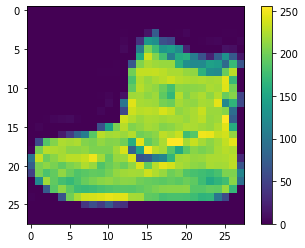

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Normalizamos esses valores de forma que fiquem no intervalo entre 0 e 1 antes de alimentar o modelo da rede neural. Para fazer isso, dividimos os valores por 255. 

É importante que o **conjunto de treinamento** e o **conjunto de validação** sejam pré-processados do mesmo modo:

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Para verificar que os dados estão no formato correto e que estamos prontos para construir e treinar a rede, vamos mostrar as primeiras 25 imagens do *conjunto de treinamento* e mostrar o nome das classes de cada imagem.

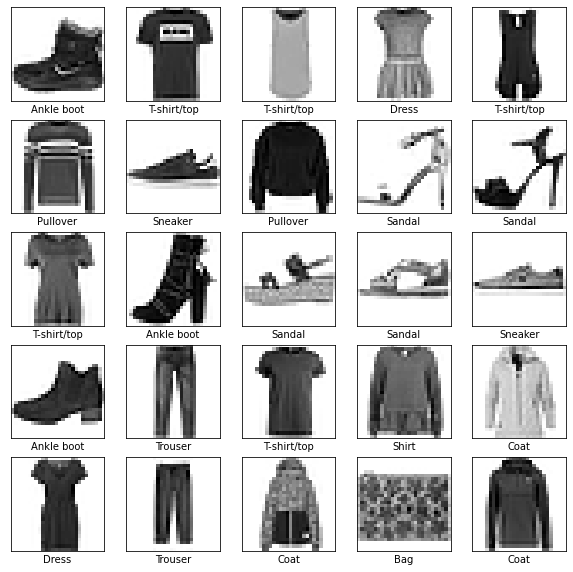

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Construindo o modelo

A construção da rede neural requer

1.   Criar e configurar as camadas do modelo,
2.   e depois, compilar o modelo.

### Montar as camadas

O principal bloco de construção de uma rede neural é a camada (*layer*). 

As camadas (*layers*) extraem representações dos dados de entrada da rede. Com sorte, essas representações serão significativas o suficiente para classificar os dados de entrada.

Muito do *deep learning* consiste em **sequencializar** (ou empilhar) várias camadas. Camadas, como `tf.keras.layers.Dense`, têm parâmetros (i.e., os pesos sinápticos e termos de bias) que são aprendidos durante a fase de treinamento.

Sequencializamos um grupo de camadas com um objeto da classe `keras.Sequential`.

Essa classe é apropriada para empilhar camadas, onde camada camada tem exatamente um tensor de entrada e um tensor de saída.

+ Um tensor é uma generalização de vetores e matrizes e é facilmente entendido como uma array multidimensional.

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

A primeira camada da rede, `tf.keras.layers.Flatten`, transforma o formato da imagem de uma array com duas dimensões (28 por 28 pixels) em uma array de dimensão (28 * 28 = 784 pixels). Essa camada não tem parâmetros a serem aprendidos durante o treinamento, ela só redimensiona os dados de entrada. Como o próprio nome diz, ela achata os dados de entrada.

Depois dos pixels serem achatados, a rede consiste de uma sequência de duas camadas do tipo `tf.keras.layers.Dense`. Essas são camadas chamadas de densamente ou totalmente conectadas. Isso significa que todos os sinais de entrada de uma camada são conectados a todos os nós (ou neurônios) daquela camada.

A primeira camada `Dense` tem 128 nós e usa a função de ativação *relu* em todos seus nós. 

A segunda (e última) camada tem 10 nós, usa uma função de ativação *softmax* e retorna uma array de 10 probabilidades. 

+ Cada nó de saída da rede gera um valor que indica a probabilidade (ou *confiança*) de que aquela imagem de entrada pertença a uma das 10 classes. A soma das 10 probabilidades sempre resulta em 1.


## Compile o modelo

Antes do modelo ser treinado, é necessário algumas configurações, as quais serão adicionadas na etapa de *compilação* do modelo:

* *Função de custo (Loss)* - Mede o quão preciso o modelo é durante seu treinamento. O objetivo é minimizar a função para *guiar* o modelo para a direção certa, ou seja, em direção ao mínimo da função. A função de custo `sparse_categorical_crossentropy` calcula a entropia cruzada entre os rótulos e as predições feitas pela rede.
* *Optimizer* - Define como o modelo é atualizado com base no conjunto de treinamento e na função de custo. Podemos usar o gradiente descendente ou uma de suas várias versões, como o `Adam`, que é uma versão com ajuste adaptativo do passo de aprendizagem.
* *Métricas* - São usadas para monitorar as iterações de treinamento e validação do modelo. O exemplo abaixo usa a *acurácia* como métrica.

In [13]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Treine o modelo

Para treinar, usamos o método `fit`. O modelo é treinado por 25 épocas com o conjunto de treinamento, ou seja, `train_images` e `train_labels` .

O modelo é treinado com *mini-batches* de tamanho igual a 32 exemplos, que é o valor padrão do parâmetro `batch_size` do método `fit`.

O método `fit` retorna um objeto do tipo `History` contendo o histórico de valores da função de custo e da acurácia ao longo das épocas de treinamento.

In [14]:
history = model.fit(train_images, train_labels, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4972 - accuracy: 0.8257
Epoch 2/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3740 - accuracy: 0.8639
Epoch 3/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3374 - accuracy: 0.8762
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3129 - accuracy: 0.8859
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2951 - accuracy: 0.8917
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2793 - accuracy: 0.8962
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2686 - accuracy: 0.8997
Epoch 8/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2568 - accuracy: 0.9048
Epoch 9/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2464 - accuracy: 0.9079
Epoch 10/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.240

À medida que o modelo treina, as métricas **loss** e **acurácia** de treinamento são mostradas. O modelo atinge uma acurácia de aproximadamente 94% com o conjunto de treinamento.

### Desempenho do modelo ao longo do treinamento

Usamos as informações contidas no objeto do tipo `History` para plotar uma figura do erro/acurácia em função das épocas de treinamento.

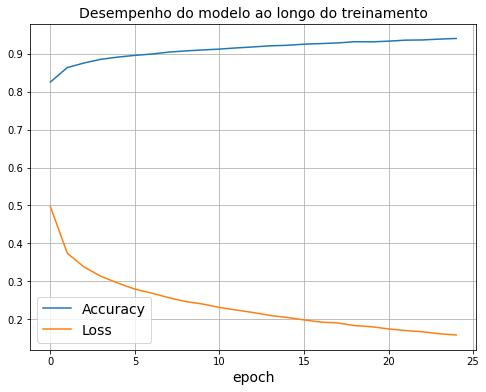

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('epoch', fontsize=14)
plt.legend(['Accuracy', 'Loss'], fontsize=14)
plt.title('Desempenho do modelo ao longo do treinamento', fontsize=14)
plt.grid()
plt.show()

## Avalie a acurácia

Em seguida, verificamos o desempenho do modelo no conjunto de validação:

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3941 - accuracy: 0.8881 - 611ms/epoch - 2ms/step

Test accuracy: 0.8881000280380249


A acurácia com o conjunto de validação é um pouco menor do que a acurácia com o conjunto de treinamento. 

Essa diferença entre as duas acurácias representa um pequeno **sobreajuste**, em inglês, *overfitting*, do modelo no conjunto de treinamento.

## Faça predições

Usaremos o modelo treinado para realizar algumas predições de exemplos do conjunto de validação.

In [17]:
predictions = model.predict(test_images)

O modelo fez a predição para cada imagem no conjunto de validação. 

Vamos olhar a saída para a primeira predição:

In [18]:
predictions[0]

array([5.1484742e-15, 4.8781372e-17, 2.1709058e-15, 4.7783846e-18,
       2.2299336e-18, 4.3495461e-08, 6.4263794e-10, 8.9800823e-04,
       4.7775692e-16, 9.9910200e-01], dtype=float32)

A predição é uma array com 10 valores. 

Eles representam a *confiança* do modelo que a imagem pertença a cada uma das diferentes classes de roupa. 

Com a função `np.argmax`, podemos verificar qual classe, ou seja, o índice, tem a maior *confiança* por parte do modelo.

In [19]:
np.argmax(predictions[0])

9

Então, o modelo está confiante de que essa imagem é uma **bota**. 

Examinando os rótulos de validação, vemos que essa classificação está correta:

In [20]:
test_labels[0]

9

## Matriz de Confusão

A matriz de confusão é uma métrica usada para verificar a desempenho do
classificador.

Com ela, podemos verificar se o modelo está confundindo classes (ou seja, rotulando incorretamente um exemplo de uma classe como sendo de outra).

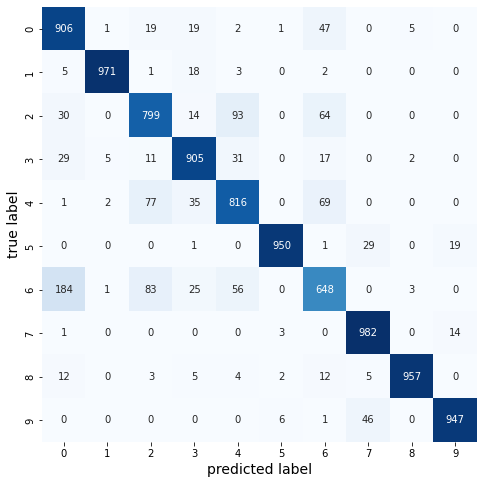

In [21]:
# Predict.
y_pred = np.argmax(model.predict(test_images), axis=1)

# Plot the confusion matrix.
plt.figure(figsize=(10, 8))
mat = tf.math.confusion_matrix(test_labels, y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, xticklabels=range(10), yticklabels=range(10), cmap="Blues")
plt.ylabel('true label', fontsize=14)
plt.xlabel('predicted label', fontsize=14)
plt.show()

Percebam que o modelo se confunde com algumas classes. O principal motivo é a semelhança entre algumas delas e, claro, a baixa qualidade das imagens.

Dois exemplos claros são 

+ Peças de roupa da classe 0 (Camisetas) sendo incorretamente classificadas como pertnecnetes à classe 6 (Camisas).
+ Peças da classe 4 (Casacos) sendo incorretamente classificadas como pertnecnetes à classe 2 (Suéters).

## Usando uma GPU

Para acelerar o treinamento do modelo com bases de dados muito grandes, podemos habilitar o uso de GPUs através do menu **Editar** e, em seguida, **Configurações de notebook**. 

## Tarefa

1. <span style="color:blue">**Laboratório #9 - Tensorflow**</span>: cliquem no link abaixo para accessar os exercícios do laboratório #9.

[![Google Colab](https://badgen.net/badge/Launch/on%20Google%20Colab/blue?icon=terminal)](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/labs/Laboratorio9.ipynb)